In [22]:
import pandas as pd

fraud_data = pd.read_csv('C:/Users/nejat/AIM Projects/week8 data/Fraud_Data.csv')
ip_data = pd.read_csv('C:/Users/nejat/AIM Projects/week8 data/IpAddress_to_Country.csv')

fraud_data.head(), ip_data.head()


(   user_id          signup_time        purchase_time  purchase_value  \
 0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
 1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
 2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
 3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
 4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   
 
        device_id source browser sex  age    ip_address  class  
 0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
 1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
 2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
 3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
 4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  ,
    lower_bound_ip_address  upper_bound_ip_address    country
 0              16777216.0                16777471  Australia
 1              16777472.0                167

In [23]:
fraud_data.isnull().sum(), ip_data.isnull().sum()

fraud_data_clean = fraud_data.dropna()
ip_data_clean = ip_data.dropna()

fraud_data_clean.isnull().sum(), ip_data_clean.isnull().sum() 


(user_id           0
 signup_time       0
 purchase_time     0
 purchase_value    0
 device_id         0
 source            0
 browser           0
 sex               0
 age               0
 ip_address        0
 class             0
 dtype: int64,
 lower_bound_ip_address    0
 upper_bound_ip_address    0
 country                   0
 dtype: int64)

In [24]:
fraud_data_clean = fraud_data_clean.drop_duplicates()
ip_data_clean = ip_data_clean.drop_duplicates()

fraud_data_clean['signup_time'] = pd.to_datetime(fraud_data_clean['signup_time'])
fraud_data_clean['purchase_time'] = pd.to_datetime(fraud_data_clean['purchase_time'])

fraud_data_clean.dtypes  


user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

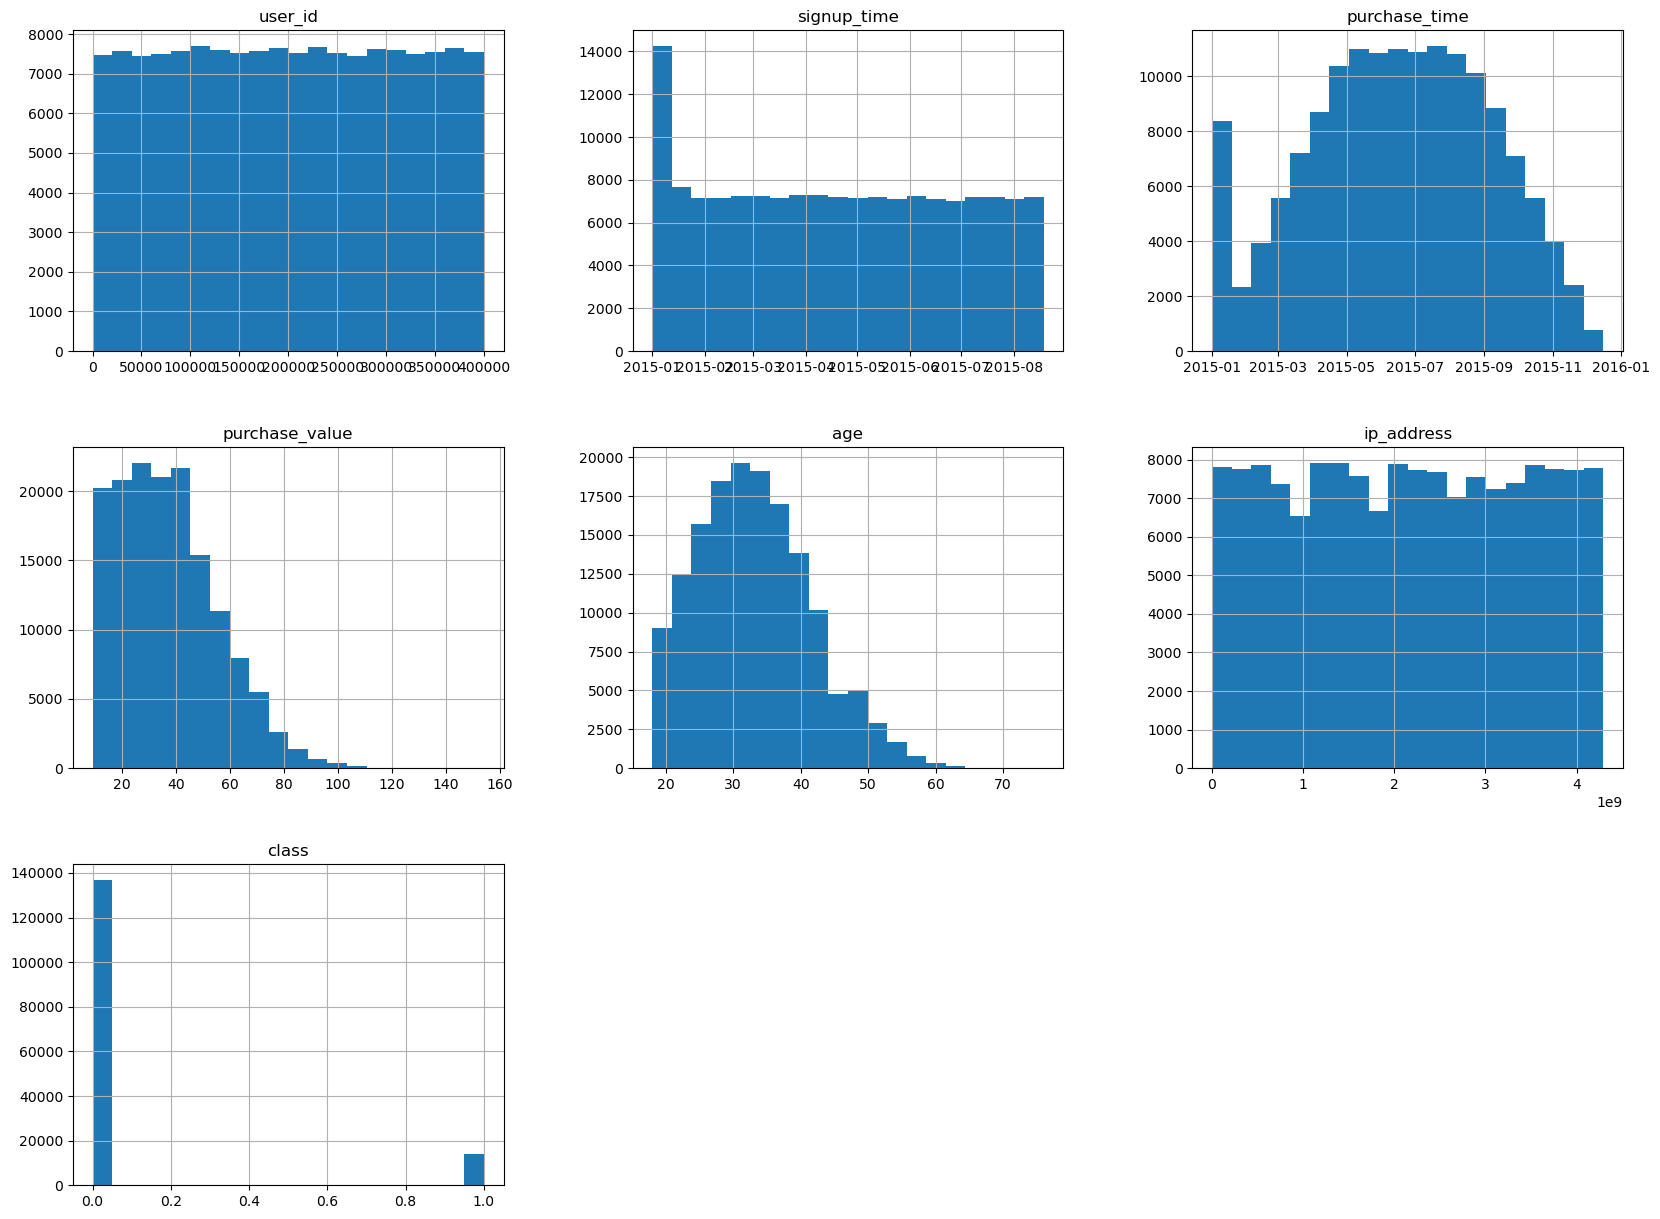

In [25]:
import matplotlib.pyplot as plt

fraud_data_clean.hist(bins=20, figsize=(20, 15))
plt.show()


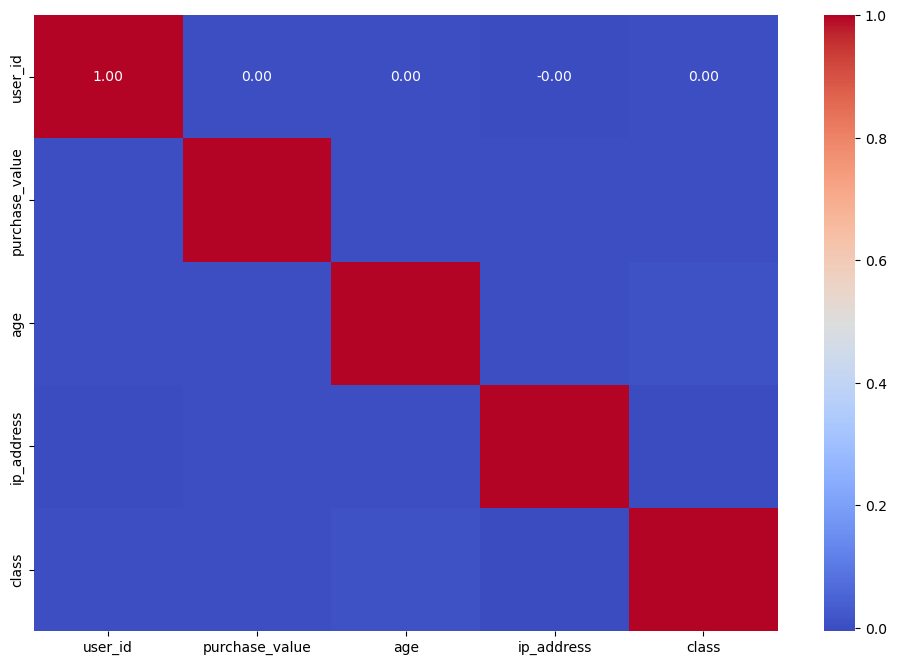

In [26]:
import numpy as np

fraud_data_numeric = fraud_data_clean.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(fraud_data_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [27]:
def ip_to_int(ip_str):
    if isinstance(ip_str, str): 
        parts = ip_str.split('.')
        return (int(parts[0]) * 256**3) + (int(parts[1]) * 256**2) + (int(parts[2]) * 256) + int(parts[3])
    return np.nan 

fraud_data_clean['ip_address'] = fraud_data_clean['ip_address'].apply(ip_to_int)

merged_data = pd.merge(fraud_data_clean, ip_data, how='left', 
                       left_on='ip_address', 
                       right_on='lower_bound_ip_address')

merged_data.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,NaN,0,NaN,NaN,NaN
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,NaN,0,NaN,NaN,NaN
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,NaN,1,NaN,NaN,NaN
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,NaN,0,NaN,NaN,NaN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,NaN,0,NaN,NaN,NaN


In [28]:
# Calculate transaction frequency
fraud_data_clean['transaction_count'] = fraud_data_clean.groupby('user_id')['purchase_time'].transform('count')
# Calculate transaction frequency
fraud_data_clean['transaction_count'] = fraud_data_clean.groupby('user_id')['purchase_time'].transform('count')
fraud_data_clean['hour_of_day'] = fraud_data_clean['purchase_time'].dt.hour
fraud_data_clean['day_of_week'] = fraud_data_clean['purchase_time'].dt.dayofweek


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
fraud_data_clean[['purchase_value', 'transaction_count']] = scaler.fit_transform(fraud_data_clean[['purchase_value', 'transaction_count']])


fraud_data_clean = pd.get_dummies(fraud_data_clean, columns=['source', 'browser', 'sex'], drop_first=True)

fraud_data_clean.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,transaction_count,hour_of_day,day_of_week,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,39,NaN,0,0.0,2,5,False,True,False,False,False,False,True
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,53,NaN,0,0.0,1,0,False,False,False,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,53,NaN,1,0.0,18,3,False,True,False,False,True,False,True
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,41,NaN,0,0.0,13,0,False,True,False,False,False,True,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,45,NaN,0,0.0,18,2,False,False,False,False,False,True,True


In [31]:
fraud_data_clean.to_csv('C:/Users/nejat/AIM Projects/week8 data/Fraud_Data_cleaned.csv', index=False)
ip_data_clean.to_csv('C:/Users/nejat/AIM Projects/week8 data/ip_cleaned.csv', index=False)
